In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model,metrics

In [10]:
data=pd.read_csv('CO2 emission.csv')

In [12]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB.1,TORQUE,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,8.5,400.0,196
1,2014,ACURA,ILX,COMPACT,2.4,2,M6,Z,11.2,7.7,9.6,9.6,890.0,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,5.9,860.0,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,4.0,6,AS6,Z,12.7,9.1,11.1,11.1,1000.0,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,4,AS6,Z,12.1,8.7,10.6,10.6,1357.0,244


In [22]:
emission = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','TORQUE','CO2EMISSIONS']]

In [23]:
emission.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,TORQUE,CO2EMISSIONS
0,2.0,4,8.5,400.0,196
1,2.4,2,9.6,890.0,221
2,1.5,4,5.9,860.0,136
3,4.0,6,11.1,1000.0,255
4,3.5,4,10.6,1357.0,244


In [24]:
emission.shape

(1067, 5)

In [25]:
emission.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,TORQUE,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.349110,5.779756,11.580881,1419.236645,256.228679
std,1.419466,1.797758,3.485595,351.701581,63.372304
min,1.000000,2.000000,4.700000,400.000000,108.000000
25%,2.000000,4.000000,9.000000,1153.500000,207.000000
50%,3.400000,6.000000,10.900000,1395.500000,251.000000
75%,4.300000,8.000000,13.350000,1632.000000,294.000000
max,8.400000,12.000000,25.800000,2699.000000,488.000000


In [21]:
emission.isnull().sum()

ENGINESIZE              0
CYLINDERS               0
TRANSMISSION            0
FUELCONSUMPTION_COMB    0
TORQUE                  0
CO2EMISSIONS            0
dtype: int64

<Figure size 1152x864 with 0 Axes>

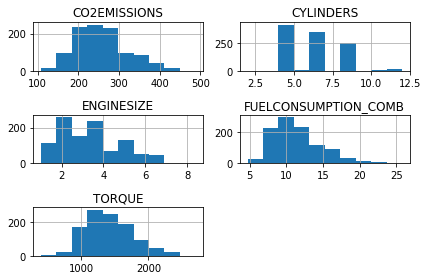

In [26]:
fig = plt.figure(figsize=(16,12))
emission.hist()
plt.tight_layout()
plt.show()

In [28]:
corr = emission.corr()
corr

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,TORQUE,CO2EMISSIONS
ENGINESIZE,1.000000,0.917457,0.816502,0.863699,0.871102
CYLINDERS,0.917457,1.000000,0.764901,0.833958,0.832688
FUELCONSUMPTION_COMB,0.816502,0.764901,1.000000,0.879636,0.892129
TORQUE,0.863699,0.833958,0.879636,1.000000,0.988196
CO2EMISSIONS,0.871102,0.832688,0.892129,0.988196,1.000000


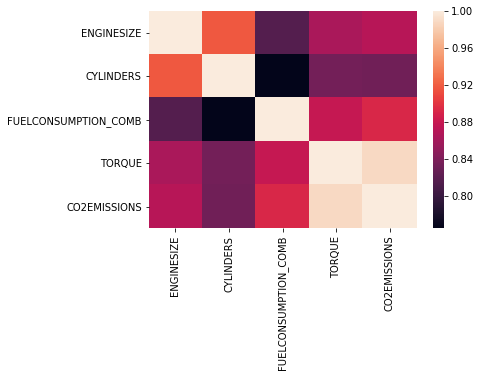

In [31]:
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

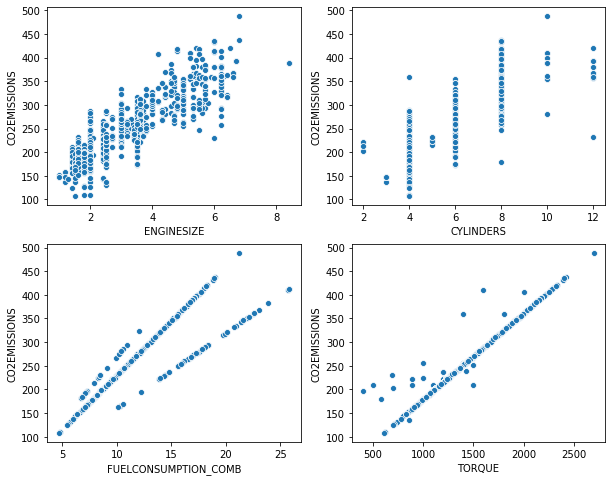

In [44]:
fig =plt.figure(figsize=(10,8))
          
a1 = fig.add_subplot(221)
a2 = fig.add_subplot(222)
a3 = fig.add_subplot(223)         
a4 = fig.add_subplot(224)          
          
          
sns.scatterplot( x = "ENGINESIZE", y= 'CO2EMISSIONS',data = emission,ax= a1)        
sns.scatterplot( x = "CYLINDERS", y= 'CO2EMISSIONS',data = emission,ax= a2)
sns.scatterplot( x = "FUELCONSUMPTION_COMB", y= 'CO2EMISSIONS',data = emission,ax= a3) 
sns.scatterplot( x = "TORQUE", y= 'CO2EMISSIONS',data = emission,ax= a4)           

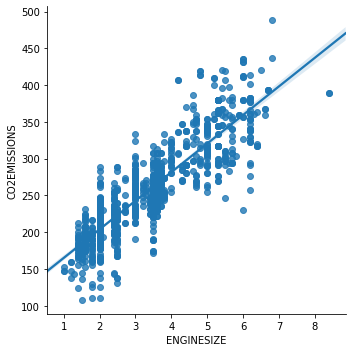

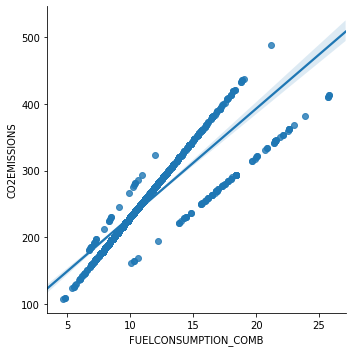

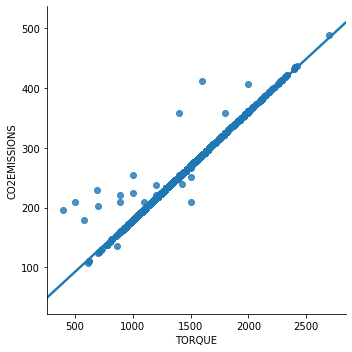

In [47]:
sns.lmplot(x='ENGINESIZE',y='CO2EMISSIONS',data=emission)
sns.lmplot(x='FUELCONSUMPTION_COMB',y='CO2EMISSIONS',data=emission)
sns.lmplot(x='TORQUE',y='CO2EMISSIONS',data=emission)

In [49]:
from sklearn.model_selection import train_test_split

In [87]:
x = emission[['TORQUE']]
y = emission['CO2EMISSIONS']

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state =5) #if random not mentioned it'' take up diff values each time you run
    

In [88]:
regre =linear_model.LinearRegression()

In [89]:
regre.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
regre.score(train_x,train_y) ## tells accuracy

0.9723611071647301

In [91]:
regre.coef_[0]

0.1776628837477559

In [92]:
regre.intercept_

4.1534670725934575

In [93]:
predict_y= regre.predict(test_x)

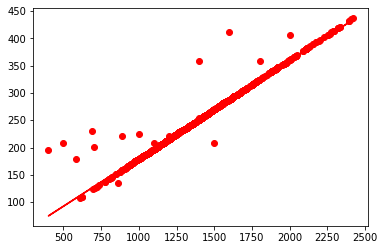

In [94]:
plt.scatter(train_x,train_y,color ='red')
plt.plot(train_x,regre.coef_[0]*train_x + regre.intercept_,'-r')
plt.show()

In [95]:
metrics.mean_squared_error(test_y,predict_y)

43.48610714134832

In [ ]:
multi_regre = linear_model